# Функциональное программирование

Функции являются абстракциями, в которых детали реализации некоторого действия скрываются за отдельным именем. Хорошо написанный набор функций позволяет использовать их много раз. 

Функциональное программирование - это стиль программирования, использующий только композиции функций. Другими словами, это программирование в выражениях, а не в императивных командах.

Как отмечает Дэвид Мертц (David Mertz) в своей статье о функциональном программировании на Python, "функциональное программирование – программирование на функциональных языках (LISP, ML, OCAML, Haskell, ...)", основными атрибутами которых являются:
- Наличие функций первого класса (функции наравне с дру-гими объектами можно передавать внутрь функций).
- Рекурсия является основной управляющей структурой в про-грамме.
- Обработка списков (последовательностей).
- Запрещение побочных эффектов у функций, что в первую очередь означает отсутствие присваивания (в "чистых" функциональных языках)
- Запрещение операторов, основной упор делается на выражения. Вместо операторов вся программа в идеале - одно выражение с сопутствующими определениями.
- Ключевой вопрос: что нужно вычислить, а не как.
- Использование функций более высоких порядков (функции над функциями над функциями)".


В математике функция отображает объекты из одного множества (множества определения функции) в другое (множество значений функции).
Математические функции (их называют "чистыми") "механически", однозначно вычисляют результат по заданным аргументам. Чистые функции не должны хранить в себе какие-либо данные между двумя вызовами. Их можно представлять себе черными ящиками, о которых известно только то, что они делают, но совсем не важно, как.
Программы в функциональном стиле конструируются как композиция функций. При этом функции понимаются почти так же, как и в математике: они отображают одни объекты в другие. В программировании "чистые" функции – идеал, не всегда достижимый на практике. Практически полезные функции обычно имеют побочный эффект: сохраняют состояние между вызовами или меняют состояние других объектов. 


Кроме того, математические функции легко работают с объекта-ми, требующими бесконечного объема информации (например, ве-щественные числа). В общем случае компьютерная программа может выполнить лишь приближенные вычисления.

## Функция: определение и вызов

Лучше всего рассмотреть синтаксис определения функции на нескольких примерах.

Определение функции должно содержать список формальных параметров и тело определения функции. 

В случае с оператором def функции также задается некоторое имя. 

Формальные параметры являются локальными именами внутри тела определения функции, а при вызове функции они оказываются связанными с объектами, переданными как фактические параметры. 

Значения по умолчанию вычисляются в момент выполнения оператора def, и потому в них можно использовать видимые на момент определения имена.

In [2]:
def func(x):
    return x + 10

print(func(4))
print(func(5))
print(func(4))

14
15
14


В следующем примере видно, как стандартная функция `divmod()` возвращает частное и остаток от деления двух чисел:

In [3]:
x = divmod(10, 3)
print(x)

(3, 1)


Важно понять, что за именем функции стоит объект. Этот объект можно связать с другим именем:

In [4]:
def add(x, y):
    return x + y

addition = add

print(add(3, 5))
print(addition(3, 5))

8
8


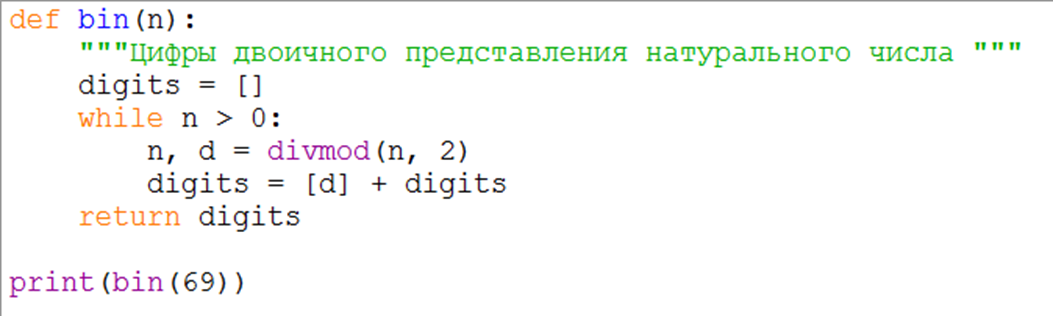

Пример, в котором в качестве значения по умолчанию аргумента функции используется изменчивый объект (список). 

Этот объект - один и тот же для всех вызовов функций, что может привести к казусам:

In [3]:
def func(a):
    a = a[:]
    a.append(4)
    return a

b = [1,2,3]
c = func(b)
print(b)
print(c)


[1, 2, 3]
[1, 2, 3, 4]


In [4]:
def mylist(val, lst=[]):
    lst.append(val)
    return lst

print(mylist(1))
print(mylist(2))
print(mylist(3))

[1]
[1, 2]
[1, 2, 3]


Правильный вариант решения будет, например, таким:

In [10]:
def mylist(val, lst=None):
    lst = lst or []
    lst.append(val)
    return lst

print(mylist(1))
print(mylist(2))
print(mylist(3))
a = [1, 2, 3]
print(mylist(5, a))

[1]
[2]
[3]
[1, 2, 3, 5]


Конечно, приведенная выше форма может использоваться для хранения в функции некоторого состояния между ее вызовами, однако, практически всегда вместо функции с таким побочным эффектом лучше написать класс и использовать его экземпляр. 

### Рекурсия

В некоторых случаях описание функции элегантнее всего выглядит с применением вызова этой же функции. Такой прием, когда функция вызывает саму себя, называется рекурсией. В функциональных языках рекурсия обычно используется много чаще, чем итерация (циклы).

В следующем примере переписывается функция bin() в рекурсивном варианте:

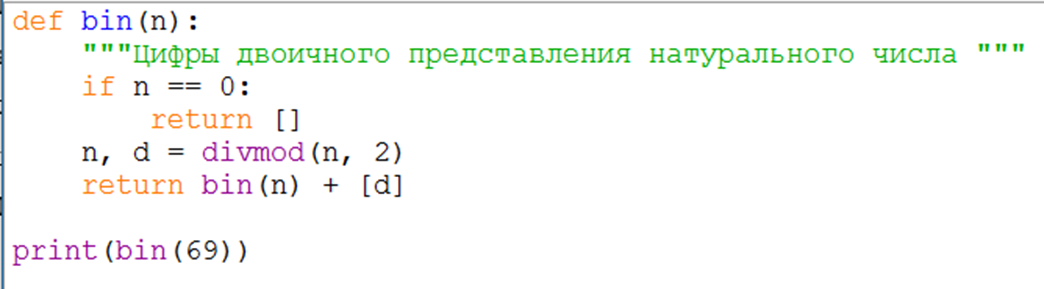

Здесь видно, что цикл while больше не используется, а вместо него появилось условие окончания рекурсии: условие, при выполнении которого функция не вызывает себя.

Конечно, в погоне за красивым рекурсивным решением не следует упускать из виду эффективность реализации. В частности, пример реализации функции для вычисления n -го числа Фибоначчи это демонстрирует: 

In [25]:
def fib(n):
    a = 0
    b = 1
    for i in range(n):
        a, b = b, a + b
    return a 

print(fib(1))
print(fib(2))
print(fib(3))
print(fib(5))

1
1
2
5


In [26]:
def fib(n):
    if n == 1 or n == 2:
        return 1
    return fib(n-2) + fib(n-1) 

print(fib(1))
print(fib(2))
print(fib(3))
print(fib(5))

1
1
2
5


В данном случае количество рекурсивных вызовов растет экспоненциально от числа n, что совсем не соответствует временной сложности решаемой задачи.

### **Python не функциональный язык программирования, но в нем есть элементы функционального программирования.**